# Spatial weights characteristics

by Luc Anselin (anselin@uchicago.edu) (8/27/2016)

A brief introduction to the treatment of spatial weights in **R** **spdep**. The discussion is limited
to reading weights information from **GAL** and **GWT** weights files created by GeoDa. This is my preferred approach.

While it is perfectly possible to create spatial weights in **R** from a shape file, this involves
some fairly detailed insight into the various spatial data objects and file conversion functions
in the **gdal** library, which is beyond the current scope. In practice, this will involve
several steps, some of which are not straightforward. We refer for details to the discussion
in Part I of the Bivand et al (2013) book, especially Chapters 2 and 4 and the "Creating Neighbours" vignette
by Roger Bivand (on the **spdep** CRAN site).

For our purposes, we will create the weights in GeoDa, read the relevant files and then
analyze the weights characteristics. This includes a plot of the connectedness structure. We will
also illustrate how to construct inverse distance weights.


We will be using the **natregimes** and
**clev_sls_154_core** sample files and the GAL and GWT weights created for them using GeoDa.


Note: this is written with R beginners in mind, more seasoned R users can probably skip most of the comments.

For more extensive details about each function, see the spdep manual and vignettes.

Packages used:

- **spdep**

- **foreign**

### Preliminaries

First, we need to load the **spdep** library. The required depencies **sp** and **Matrix** will be
loaded as well.

Also, make sure the current working directory contains the dbf, GAL and GWT files for the two sample data sets.

In [1]:
library(spdep)

Loading required package: sp
Loading required package: Matrix


### Creating a neighbor list from a GAL weights file

In spdep, there are two classes to deal with weights, one is a neighbor list, or class **nb**, the other
a weights list, or class **listw**. Neighbor lists are lists of neighbors, but do not contain the actual 
weights. In this sense, they are similar to GAL and GWT files, which also only contain the neighbor relations.
In GeoDa, this is converted into (row-standardized) weights internally. In most instances in spdep, you 
must create the weights object explicitly.

We start with the **read.gal** function with the default argument, i.e., the file name of the GAL file.
We use **natregimes_q.gal** (queen contiguity for U.S. counties).

In [2]:
nb1 <- read.gal("natregimes_q.gal")

ERROR: Error in read.gal("natregimes_q.gal"): GAL file IDs and region.id differ


What happened? The default assumption in spdep is that the observation IDs are simple sequence number.
However, in our natregimes example, we used **FIPSNO** as the ID variable. In order to keep these ID
values, we need to set **override.id = TRUE** in the arguments to the **read.gal** function.

In [3]:
nb1 <- read.gal("natregimes_q.gal",override.id=TRUE)

We can now list the contents of the neighbor list object. Note that spdep gives a summary of the 
characteristics, and not a listing of all the neighbor relations. The **summary** command gives slightly
more extensive information.

In [4]:
nb1

Neighbour list object:
Number of regions: 3085 
Number of nonzero links: 18168 
Percentage nonzero weights: 0.190896 
Average number of links: 5.889141 

In [5]:
summary(nb1)

Neighbour list object:
Number of regions: 3085 
Number of nonzero links: 18168 
Percentage nonzero weights: 0.190896 
Average number of links: 5.889141 
Link number distribution:

   1    2    3    4    5    6    7    8    9   10   11   13   14 
  24   36   91  281  620 1037  704  227   50   11    2    1    1 
24 least connected regions:
53009 53029 25001 44005 36103 51840 51660 6041 51790 51820 51540 51560 6075 51580 51530 51131 51115 51770 51720 51690 51590 27031 26083 55029 with 1 link
1 most connected region:
49037 with 14 links


#### Internals of the neighbor list object

We can check some characteristics of the just created object using **class**, which yields **nb**,
and **length**, which gives 3085.

In [6]:
class(nb1)

[1] "nb"

In [7]:
length(nb1)

[1] 3085

A more comprehensive view of the structure of the neighbor list is given by the **str** command.
We see that this object consists of several attributes, the most important of which is a list
of 3085 lists that contain the sequence numbers (not the neigbhorhood IDs!) with the neighbors
for each observation. In addition, the neighbor list has several attributes extracted from the
header line of the GAL file, such as the attribute **GeoDa**, which contains the name of the
shape file (**shpfile**) and the region ID (**ind**). The actual region IDs are stored as
characters in the **region.id** attribute.

In [80]:
str(nb1)

List of 3085
 $ : int [1:3] 23 31 41
 $ : int [1:3] 3 4 70
 $ : int [1:4] 2 5 63 70
 $ : int [1:7] 2 28 32 43 56 69 70
 $ : int [1:4] 3 6 29 63
 $ : int [1:3] 5 7 29
 $ : int [1:4] 6 8 29 50
 $ : int [1:9] 7 9 44 50 60 64 71 87 89
 $ : int [1:3] 8 10 44
 $ : int [1:3] 9 11 44
 $ : int [1:4] 10 12 44 47
 $ : int [1:3] 11 24 47
 $ : int [1:4] 14 27 33 36
 $ : int [1:3] 13 15 33
 $ : int [1:5] 14 16 30 33 37
 $ : int [1:4] 15 17 30 34
 $ : int [1:4] 16 18 34 42
 $ : int [1:3] 17 19 42
 $ : int [1:5] 18 20 39 42 46
 $ : int [1:4] 19 21 39 40
 $ : int [1:3] 20 22 40
 $ : int [1:4] 21 23 38 40
 $ : int [1:4] 1 22 38 41
 $ : int [1:4] 12 25 47 79
 $ : int [1:5] 24 26 67 79 88
 $ : int [1:5] 25 27 36 61 67
 $ : int [1:3] 13 26 36
 $ : int [1:2] 4 32
 $ : int [1:7] 5 6 7 50 62 63 66
 $ : int [1:5] 15 16 34 37 76
 $ : int [1:4] 1 35 41 73
 $ : int [1:4] 4 28 43 48
 $ : int [1:7] 13 14 15 36 37 57 59
 $ : int [1:6] 16 17 30 42 74 76
 $ : int [1:5] 31 51 73 121 134
 $ : int [1:7] 13 26 27 33 57 59

Since the neighbor list is a list of lists, you can extract any element using the double bracket [[ ]] notation.

For example, the first element yields the sequence numbers 23, 31 and 41 as neigbhors.

In [8]:
nb1[[1]]

[1] 23 31 41

To extract the actual IDs that correspond to this, we need to keep in mind the special
structure of the neighbor list object. For example, the following doesn't work.

In [9]:
nb1$region.id

NULL

Instead, we need to extract the **region.id** **attribute** using the **attr** command. This takes
two arguments, the object of interest (w1) and the type of attribute, as a string ("region.id").

We use **head** to list the first few elements.

In [10]:
w1att <- attr(nb1,"region.id")
head(w1att)

[1] "27077" "53019" "53065" "53047" "53051" "16021"

Now, we can extract the ID values that correspond to the sequence numbers for the neighbors
of the first observation.

In [11]:
w1att[1]
w1att[c(23,31,41)]

[1] "27077"

[1] "27135" "27071" "27007"

This matches the entry in the natregimes_q.gal file.

Keep in mind that these are strings (note the quotes) and not integers. This may matter in later manipulations.

#### Check for symmetry

Note how one of the attributes of the neighbor list is **sym**. This is a logical variable
that shows whether or not the weights are symmetric. Since our example is for queen contiguity,
this is indeed the case. We can extract this attribute using the **attr** command, as we did before, 
but now specifying "sym".

In [12]:
attr(nb1,"sym")

[1] TRUE

There is also a built-in function **is.symmetric.nb** which accomplishes the same result.

In [13]:
is.symmetric.nb(nb1)

[1] TRUE

### Creating a neighbor list from a GWT weights file

Creating a neighbor list from a **GWT** file is slightly more complex. It requires the
function **read.gwt2nb**. Again, this takes as argument the file name. A second argument
pertains to the **region.id**. The default is that no **region.id** is specified, and
simple sequence numbers are used. However, when a **region.id** is specified, this variable
must be available in the workspace, unlike what is the case for **GAL** files. This implies
that we first have to read the **dbf** file associated with the shape (and weights), for which
we need the **foreign** package.

We first load the library, then pass **clev_sls_154_core.dbf** as the argument to the
**read.dbf** function, and finally summarize the resulting data frame.

In [14]:
library(foreign)
dat2 <- read.dbf("clev_sls_154_core.dbf")
summary(dat2)

   unique_id             parcel          x                 y         
 Min.   :  1183   002-02-036:  1   Min.   :2176680   Min.   :647224  
 1st Qu.:  8837   002-02-053:  1   1st Qu.:2182510   1st Qu.:652774  
 Median : 21504   002-14-053:  1   Median :2189250   Median :657074  
 Mean   : 36650   002-15-038:  1   Mean   :2192729   Mean   :659472  
 3rd Qu.: 62055   002-15-043:  1   3rd Qu.:2204140   3rd Qu.:663162  
 Max.   :168806   002-16-003:  1   Max.   :2210280   Max.   :684677  
                  (Other)   :199                                     
   sale_price       tract10int        Quarter      year1        yrquarter  
 Min.   :  1049   Min.   :101200   Min.   :4   Min.   :2015   Min.   :154  
 1st Qu.:  9000   1st Qu.:104200   1st Qu.:4   1st Qu.:2015   1st Qu.:154  
 Median : 20000   Median :106100   Median :4   Median :2015   Median :154  
 Mean   : 41897   Mean   :111505   Mean   :4   Mean   :2015   Mean   :154  
 3rd Qu.: 48500   3rd Qu.:113801   3rd Qu.:4   3rd Qu.:2015 

The ID variable is **unique_id**. We use the **read.gwt2nb** command with the
filename **clev_sls_154_core_d.gwt** (distance-band weights using the default max-min
cut-off) and with region.id = dat2$unique_id. If you forget to specify the region.id,
the default of NULL will be used, which will bring up a warning message and 
 create an empty neighbor object.

In [15]:
nb2 <- read.gwt2nb("clev_sls_154_core_d.gwt",region.id=dat2$unique_id)
nb2

Warning message:
In read.gwt2nb("clev_sls_154_core_d.gwt", region.id = dat2$unique_id): region.id not named unique_id

Neighbour list object:
Number of regions: 205 
Number of nonzero links: 2592 
Percentage nonzero weights: 6.167757 
Average number of links: 12.6439 

Note the strange warning message. Everything works fine, but this seems to suggest that unique_id is not
in the workspace. This is likely because we referred to it as dat2$unique_id. If instead we first 
**attach** the data frame dat2, which makes the variable unique_id available, we don't get the warning.

The use of **attach** and **detach** is discouraged in some R circles, but as long as you only work with
one data set at a time, it is not too problematic.

So, after attaching **dat2**, we re-run the **read.gwt2nb** command, and all is well. We summarize the neighbor list
object as we did before.

In [16]:
attach(dat2)
nb3 <- read.gwt2nb("clev_sls_154_core_d.gwt",region.id=unique_id)
summary(nb3)

Neighbour list object:
Number of regions: 205 
Number of nonzero links: 2592 
Percentage nonzero weights: 6.167757 
Average number of links: 12.6439 
Link number distribution:

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 6  6  9  5  5 10  8 10 13 12 11  6 17  8  9 11 13  6 10  7  2  4  6  2  1  1 
27 28 29 30 32 
 1  2  1  1  2 
6 least connected regions:
11359 40925 40961 41083 41161 77675 with 1 link
2 most connected regions:
19195 19785 with 32 links


The internal structure of the neighbor list created from a GWT file is the same as for a GAL file,
with one exception. The **GeoDa** attribute now also includes the actual distances between neighbors.
For each observation, this is a list of distance values.

So, the three components of the GWT file are included in three separate items in the neighbor list
object. First, is the list of neighbors as sequence numbers. This can be extracted by means of the 
double bracket notation. For example, for the first observation, which has 9 neighbors, this gives:

In [17]:
n1 <- nb3[[1]]
n1

[1]  2  6  7  8  9 10 31 32 34

Next are the IDs that correspond to this. As before, we create a vector with these values
by extracting the "region.id" attribute. Note that, in contrast to what happens for GAL files,
the region.id values are integers and not characters. This is because they are extracted explicitly
from the data frame, where they are stored as integers.

In [18]:
w3att <- attr(nb3,"region.id")
head(w3att)

[1] 1183 1198 1516 1606 1612 1624

Now, we can list the ID of the first observation, together with the IDs of its neighbors.

In [19]:
w3att[1]
w3att[n1]

[1] 1183

[1] 1198 1624 1741 2024 2170 2341 6842 6845 7058

Finally, we extract the corresponding distances. These are part of the "GeoDa" attribute. This itself is a list
with three components, **dist**, a list of lists of distance values, **shpfile** and **ind** (same as for GAL files).
You can see the details of the structure by means of the **str** command (omitted here because of its lengthy
output). The expression may seem somewhat complex, but there is a logic to it. First, we extract the "GeoDa"
attribute. From that, we select the $dist component, and finally, we take the first element [1] of that.
The result is a list with the distances.

In [20]:
d <- attr(nb3,"GeoDa")$dist[1]
d

[[1]]
[1]  385.161 3013.071 1160.312 1858.904 3367.150 2525.503 3253.025 3390.735
[9] 3369.644

### Plotting the structure of a neighbor list

In addition to the standard print and summary functions, neighbor lists can also be plotted as a graph.
This provides a visual summary of the connectedness structure. The **plot** function requires
a neighbor list argument and a matching n by 2 matrix of point coordinates that will serve
as nodes in the graph. Since we have attached the data set, column-binding (cbind) the variables **x**
and **y** will provide the coordinates. We can use all the standard plotting arguments to embellish
the plot. In our example, the line width (**lwd**) is set to 0.2 (the default crowds the plot too much), and just
for fun, the color (**col**) is set to "blue". This can be made much more nicer looking by adding titles, etc., 
which we don't pursue here.

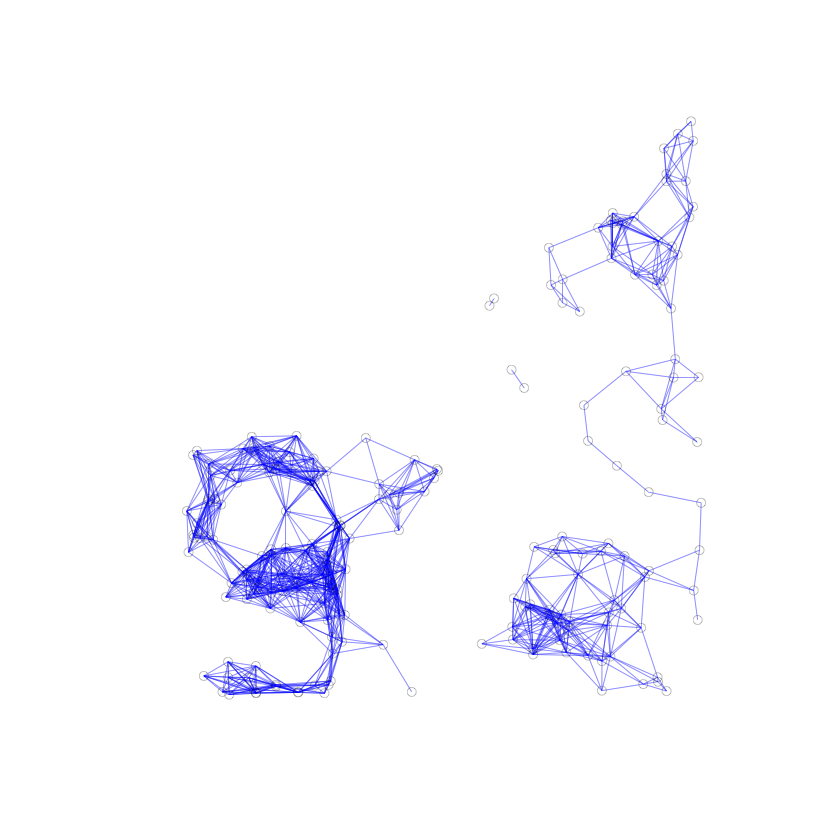

In [21]:
coordn <- cbind(x,y)
plot(nb3,coordn,lwd=0.2,col="blue")

The plot reveals a very interesting structure, where the data are essentially split into two
large unconnected subgraphs, with two sets of two observations unconnected from either.
Since we used the default max-min distance band, every node is connected to another node.

To illustrate the treatment of isolates (unconnected observations), we read in the file
**clev_sls_154_core_d1500.gwt**, which used a distance band of 1500ft, clearly less than
the max-min distance. Several warning messages are generated and the summary reveals
24 regions with no links.

In [22]:
nb4 <- read.gwt2nb("clev_sls_154_core_d1500.gwt",region.id=unique_id)
summary(nb4)

Warning message:
In read.gwt2nb("clev_sls_154_core_d1500.gwt", region.id = unique_id): 3754, 4072, 7404, 10114, 11359, 20493, 41281, 59428, 59649, 61351, 62046, 62055, 62122, 63759, 63840, 64585, 65975, 70548, 73001, 73581, 76214, 77675, 140008, 168450 are not originsWarning message:
In read.gwt2nb("clev_sls_154_core_d1500.gwt", region.id = unique_id): 3754, 4072, 7404, 10114, 11359, 20493, 41281, 59428, 59649, 61351, 62046, 62055, 62122, 63759, 63840, 64585, 65975, 70548, 73001, 73581, 76214, 77675, 140008, 168450 are not destinations

Neighbour list object:
Number of regions: 205 
Number of nonzero links: 624 
Percentage nonzero weights: 1.48483 
Average number of links: 3.043902 
24 regions with no links:
3754 4072 7404 10114 11359 20493 41281 59428 59649 61351 62046 62055 62122 63759 63840 64585 65975 70548 73001 73581 76214 77675 140008 168450
Link number distribution:

 0  1  2  3  4  5  6  7  8  9 10 
24 31 36 35 24 27 18  6  2  1  1 
31 least connected regions:
2170 3133 4527 6584 9372 16351 16561 40925 40961 41083 41161 41467 41584 42418 42961 43375 44020 44062 44502 46656 46704 59709 60087 63399 63614 63651 71170 73339 73429 168544 168726 with 1 link
1 most connected region:
19560 with 10 links


The plot clearly illustrates the much sparser structure of the network as well as the location of
the isolates. These are points that are more than 1500ft from their nearest neighbor. In general,
the graph has broken down into several small unconnected subgraphs.

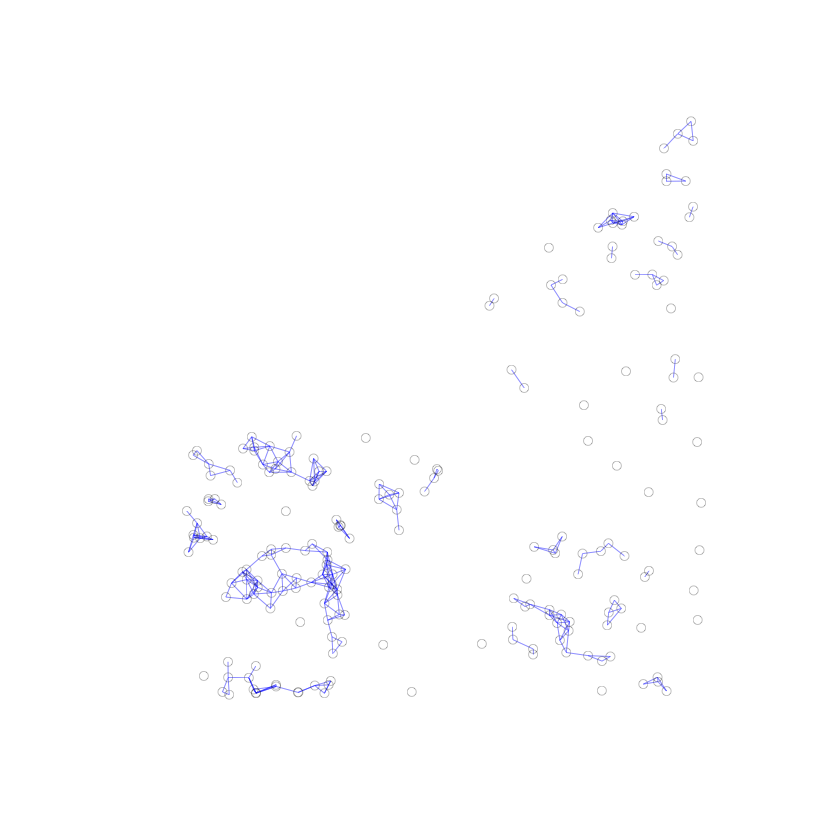

In [23]:
plot(nb4,coordn,lwd=0.2,col="blue")

Finally, to illustrate the much more balanced weights structure we obtained by applying 
contiguity to the Thiessen polygons, we read in the GAL file with those weights:
**cleav_sls_154_core_q.gal** and summarize its properties.

In [24]:
nb5 <- read.gal("clev_sls_154_core_q.gal",region.id=unique_id)
summary(nb5)

Neighbour list object:
Number of regions: 205 
Number of nonzero links: 1142 
Percentage nonzero weights: 2.71743 
Average number of links: 5.570732 
Link number distribution:

 2  3  4  5  6  7  8  9 10 
 1 12 38 51 55 30  9  5  4 
1 least connected region:
44802 with 2 links
4 most connected regions:
7404 9372 19758 20493 with 10 links


The plot reveals a fully connected graph with most nodes having about average links
(from the summary, we see that the links range from 2 to 10).

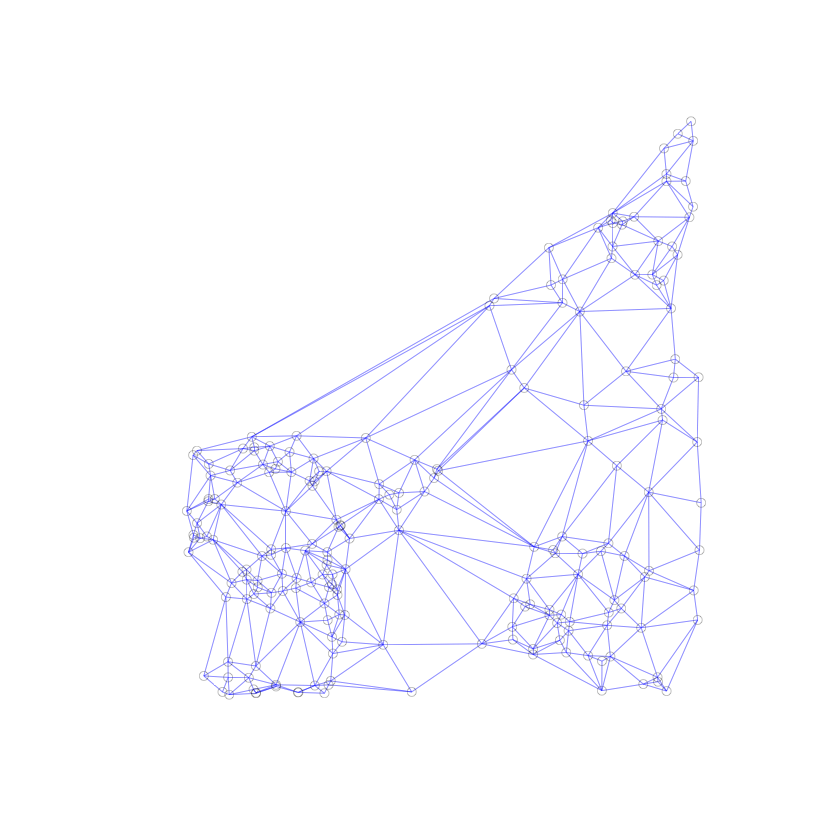

In [25]:
plot(nb5,coordn,lwd=0.2,col="blue")

### Constructing the weights

Most of the spatial analytical operations we will cover require actual weights objects, and not just neighbor lists.
The proper weights object
is of the type **listw**. We convert a neighbor list to an actual weights list by means of the **nb2listw** command.

The default settings are usually OK, unless there are isolates in the data set. In that case, you want to make
sure to set the **zero.policy** argument to **TRUE** (the default is **FALSE**, which stops the program whenever
isolates are encountered). The default value for the **style** argument is **'W'**, which corresponds to
row-standardization, so that is usually what we want.

To illustrate the effect of the **zero.policy** argument, we will convert nb4, the neighbor list with many isolates. Since we use the defaults for all arguments, the only item that needs to be specified is the neighbor list object,
**nb4**. Next, we set **zero.policy** to **TRUE**. Note that we also have to specify this option for the
**summary** command, otherwise it will generate an error message.

In [26]:
w4 <- nb2listw(nb4)
summary(w4)

ERROR: Error in nb2listw(nb4): Empty neighbour sets found


In [32]:
w4a <- nb2listw(nb4,zero.policy=TRUE)
summary(w4a,zero.policy=TRUE)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 205 
Number of nonzero links: 624 
Percentage nonzero weights: 1.48483 
Average number of links: 3.043902 
24 regions with no links:
3754 4072 7404 10114 11359 20493 41281 59428 59649 61351 62046 62055 62122 63759 63840 64585 65975 70548 73001 73581 76214 77675 140008 168450
Link number distribution:

 0  1  2  3  4  5  6  7  8  9 10 
24 31 36 35 24 27 18  6  2  1  1 
31 least connected regions:
2170 3133 4527 6584 9372 16351 16561 40925 40961 41083 41161 41467 41584 42418 42961 43375 44020 44062 44502 46656 46704 59709 60087 63399 63614 63651 71170 73339 73429 168544 168726 with 1 link
1 most connected region:
19560 with 10 links

Weights style: W 
Weights constants summary:
    n    nn  S0       S1       S2
W 181 32761 181 143.5363 749.5522


In addition to the same connectedness statistics as for a neighbor list, the summary now also includes several
numeric values that are used in the computation of tests for spatial autocorrelation and in spatial regression
models. This includes the threesome S0, S1 and S2, which are various summations of the weights. S0 in particular
is the sum of all the weights. For row-standardized weights (style="W"), this should add up to the number
of observations. However, in this case, since there are 24 isolates, it adds up to 205-24=181. Note that n is
listed as 181, which is the number of connected observations, not the size of the data set (205).

Now, lets move away from the isolates case and convert the neighbor list with queen contiguities for the Cleveland
locations, nb5. Since there are no isolates, we can use the default setting.

In [33]:
w5 <- nb2listw(nb5)
summary(w5)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 205 
Number of nonzero links: 1142 
Percentage nonzero weights: 2.71743 
Average number of links: 5.570732 
Link number distribution:

 2  3  4  5  6  7  8  9 10 
 1 12 38 51 55 30  9  5  4 
1 least connected region:
44802 with 2 links
4 most connected regions:
7404 9372 19758 20493 with 10 links

Weights style: W 
Weights constants summary:
    n    nn  S0       S1      S2
W 205 42025 205 76.82244 835.436


Note how now both n and S0 equal 205.

#### Internals of a weights object

The weights object contains all the components of a neighbor list as well as the actual spatial
weights values. The latter are stored as a list of lists (one for each observation) in the 
**weights** attribute. We can look at the detailed structure of the object using the **str** command,
but we will skip that since the output is very long (it includes all the neighbors and all the weights).

We can access individual weights lists by means of either the $weights notation, or by using double 
brackets [[3]], followed by the index of the observation of interest in [ ].

The two equivalent approaches are illustrated for the first obsevation.

In [42]:
w5$weights[1]

[[1]]
[1] 0.25 0.25 0.25 0.25

In [43]:
w5[[3]][1]

[[1]]
[1] 0.25 0.25 0.25 0.25

So far, we have used the default of row-standardized weights. If we want the unstandardized (binary) weights,
we need to specify the **style** as **B** in the **nb2listw** command. We illustrate this with the same 
**nb5** neighbor list.

In [44]:
w5a <- nb2listw(nb5,style="B")
summary(w5a)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 205 
Number of nonzero links: 1142 
Percentage nonzero weights: 2.71743 
Average number of links: 5.570732 
Link number distribution:

 2  3  4  5  6  7  8  9 10 
 1 12 38 51 55 30  9  5  4 
1 least connected region:
44802 with 2 links
4 most connected regions:
7404 9372 19758 20493 with 10 links

Weights style: B 
Weights constants summary:
    n    nn   S0   S1    S2
B 205 42025 1142 2284 27304


The connectivity characteristics of the weights are the same as before, but the numerical
properties are not. Note for example, that S0 is now 1142, the total number of non-zero weights.

We can access the actual weights values in the same way as before. The values of the weights are all 1 (since
the zero values are not stored).

In [45]:
w5a$weights[1]

[[1]]
[1] 1 1 1 1

#### Plotting a weights object

Since a weights object contains a neighbor list, its network structure can be plotted in the
same way. We need to pass the list weights object and a matrix of coordinates. The plot is
identical to that of the neighbor list.

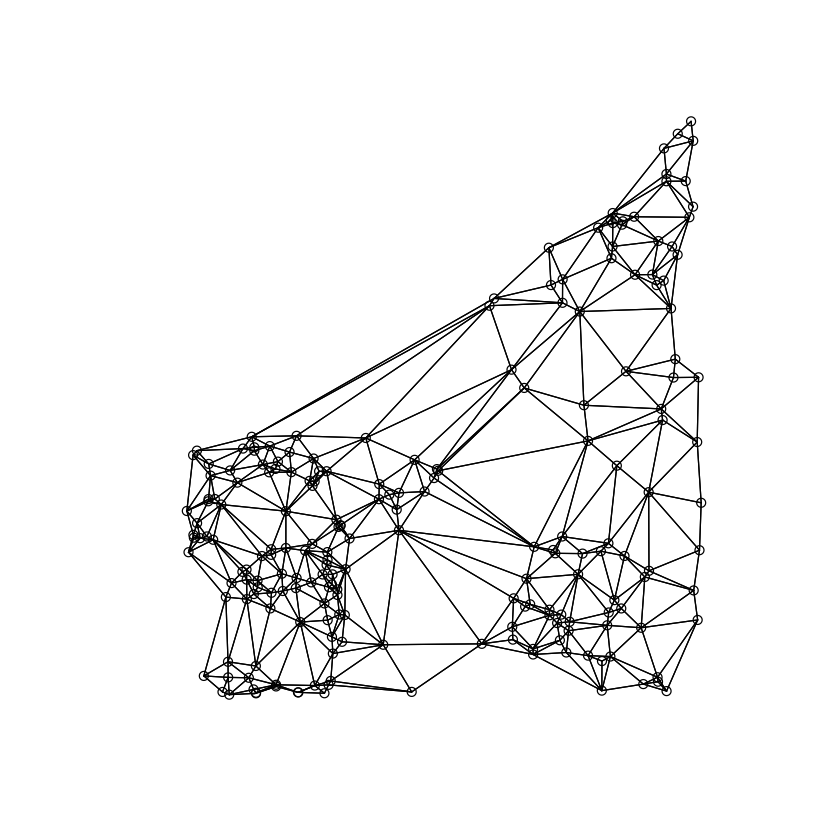

In [34]:
plot(w5,coordn)

### Inverse distance weights

In spdep, there is no explicit function to create inverse distance weights. However,
there is a way to specify the weights directly in the **nb2listw** function, in the
attribute **glist**. As long as we can extract the distances from a neighbor list object
(e.g., one that was read from a GWT file), we can compute the inverse distances and pass
them as weights through the **glist** argument. Note that one could also compute these
distances from the coordinates in R itself (using **nbdists**), but that's beyond our current scope.
Also, this approach can be readily extended to any other function of the distances, such
as inverse square distance, or negative exponential.

We will use the default distance band weights for the Cleveland points, which we turned into
the neigbhor list **nb3**. We first extract the list of lists of distances (one list for each
obsrvation) using the **attr** function, specifying **GeoDa** as the attribute, and selecting
the component **dist**. We see that this is indeed a list with the proper length.

In [47]:
nd3 <- attr(nb3,"GeoDa")$dist
length(nd3)

[1] 205

The first element of this list is itself a list with the distances to the neighbors of 
the first observation.

In [48]:
nd3[1]

[[1]]
[1]  385.161 3013.071 1160.312 1858.904 3367.150 2525.503 3253.025 3390.735
[9] 3369.644

Now we get fancy and use one of the most powerful features of R, one of the family of **apply** functions.
We could of course write this as a loop and go through the list for each observation in turn, but
R has very powerful vectorizing functions that speed this process up considerably (this really matters
when you have a lot of obsevations). The principle is that an anonymous function (i.e., a function without
a name) will be applied to each element of the list in turn, without having to explicitly write a loop.

In our example, we will use **lapply** (think of it as apply a function to the elements of a list). We specify the list of lists as the
first argument, and the anonymous function as the second. Generically, this is specified as **function(x)**,
followed by the particular manipulation we want to apply to x. In our case, this is simply the inverse, **1/x**.

The full command is then as shown below.

In [67]:
invd3 <- lapply(nd3,function(x) (1/x))

In [68]:
length(invd3)

[1] 205

We see that **invd3** has the proper length, and we can also check its first elements. Each
value is exactly the inverse of the distance values we had earlier.

In [69]:
invd3[1]

[[1]]
[1] 0.0025963168 0.0003318873 0.0008618371 0.0005379514 0.0002969871
[6] 0.0003959608 0.0003074062 0.0002949213 0.0002967673

Note that these values are very small (they would be even smaller if we applied inverse
distance squared). In practice, this often constitutes a problem and it is related to the
scale in which the distance is expressed. In our case, these are feet, so that the values can
be quite large, and as a result, their inverse quite small, even to the point of being
hardly distinguisheable from zero (for squared inverse distance).

To correct for this scale dependence, we may want to rescale the distances in the process,
for example, dividing them all by 100 (you want to avoid ending up with inverse distances
that are larger than 1, which may happen if you divide by too large a number, such as 1000).

The new scaled inverse distances are computed in the same way, with only a slight adjustment
to the anonymous function.

In [70]:
invd3a <- lapply(nd3,function(x) (1/(x/100)))
invd3a[1]

[[1]]
[1] 0.25963168 0.03318873 0.08618371 0.05379514 0.02969871 0.03959608 0.03074062
[8] 0.02949213 0.02967673

We now create the corresponding spatial weights object by means of the **nb2listw** function, but
passing our inverse distances **invd3a** as the value for the argument **glist**. If we want to 
keep the actualy inverse distances (which we typically do), we need to also specify the **style**
as **B**. Otherwise, the default row-standarization will be applied to the inverse distance values.

The new weights object is then created as:

In [71]:
w6 <- nb2listw(nb3,glist=invd3a,style="B")

In [72]:
summary(w6)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 205 
Number of nonzero links: 2592 
Percentage nonzero weights: 6.167757 
Average number of links: 12.6439 
Link number distribution:

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 6  6  9  5  5 10  8 10 13 12 11  6 17  8  9 11 13  6 10  7  2  4  6  2  1  1 
27 28 29 30 32 
 1  2  1  1  2 
6 least connected regions:
11359 40925 40961 41083 41161 77675 with 1 link
2 most connected regions:
19195 19785 with 32 links

Weights style: B 
Weights constants summary:
    n    nn       S0       S1       S2
B 205 42025 180.2882 145.9202 1018.442


We see that the connectedness structure is again the same as before, but the quantitative 
weights properties are different. For example, the value of S0 no longer has a relation to
either the number of observations or the number of non-zero links, but it is the sum of all
the inverse distance weights.

The weights themselves can be extracted as before. They are exactly the inverse distances
we computed.

In [73]:
w6$weights[1]

[[1]]
[1] 0.25963168 0.03318873 0.08618371 0.05379514 0.02969871 0.03959608 0.03074062
[8] 0.02949213 0.02967673